In [4]:
import re
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

direct_io_log_content = open("Resources/io_information/LOG_with_io_details_directio","r").readlines()
none_direct_io_log_content = open("Resources/io_information/LOG_with_io_details_not_directio","r").readlines()

EVENTS = ['flush_finished']
# ,'compaction_finished']

io_measurements = ["file_write_nanos",
                   "file_fsync_nanos",
                   "file_prepare_write_nanos",
                   # "file_cpu_write_nanos",
                   # "file_cpu_read_nanos",
                   ]
flush_io_detail_dict = {}
compaction_io_detail_dict = {}


for io_measurement in io_measurements:
    flush_io_detail_dict[io_measurement]=[]
    compaction_io_detail_dict[io_measurement]=[]


IO details in None DirectIO model db_bench

{'file_write_nanos': [49813318, 49377333, 38356938, 49758435, 35350973, 49445831, 49335736, 49375041, 51274932, 49469544, 49389900, 49206139, 39839073, 35113151, 35129022, 49263897, 48897456, 41054412, 35330502, 35863896, 46658785, 36110783, 35391002, 35333282, 45426915, 36372679, 35115426, 35376593, 51092674, 39674877, 35202359, 35516102, 36481802, 48917388, 35349545, 35388208, 42490855, 45064193, 35222302, 35872994, 45649614, 43953760, 35517102, 35209296, 50560617, 43411570, 39254726, 35226774, 48410355, 49482648, 45474534, 35075114, 44842348, 39719568, 35641227, 35624951, 38927257, 37205612, 36794121, 41240626, 37368421, 39646326, 36031903, 36627880, 38438143, 36913585, 37165201, 40701224, 36662225, 45003769, 38433748, 36238294, 42113939, 36460757, 36048893, 43114262, 36983781, 37171888, 39824478, 36804898, 39972643, 37247868, 37259176, 35640795, 43799772, 36298746, 52599831, 35826575, 36791279, 35646423, 36570223, 37834035, 38964936, 35320793, 37375850, 49415762, 40197642, 35847937

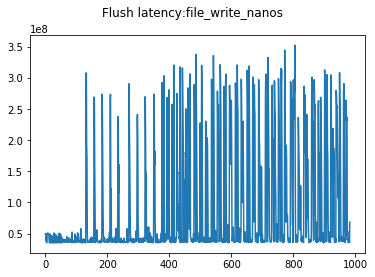

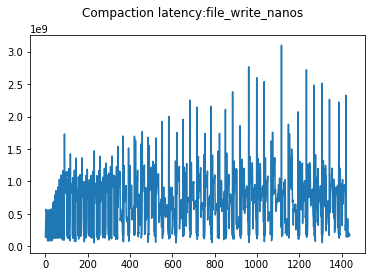

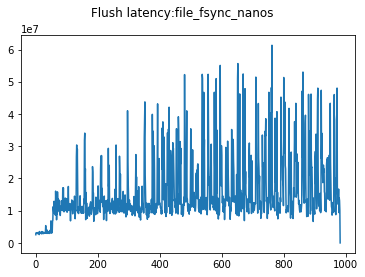

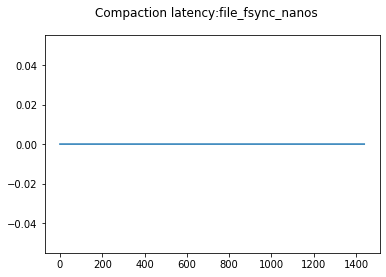

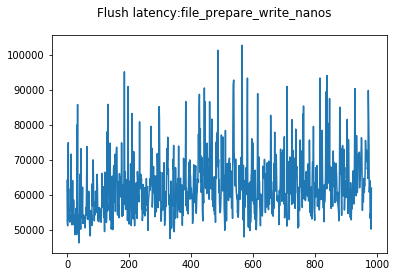

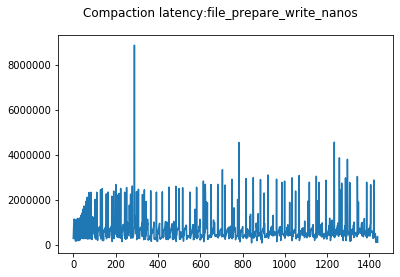

In [5]:
for line in direct_io_log_content:
    # print(line)
    line = re.search('(\{.+\})', line)
    if line:
        log_row = json.loads(line[0])
        if log_row['event'] == 'flush_finished':
            for io_measurement in io_measurements:
                flush_io_detail_dict[io_measurement].append(log_row.get(io_measurement,0))
        if log_row['event'] == 'compaction_finished':
            for io_measurement in io_measurements:
                compaction_io_detail_dict[io_measurement].append(log_row.get(io_measurement,0))

print(flush_io_detail_dict)
print(compaction_io_detail_dict)

for io_measurement in io_measurements:
    plt.figure()
    plt.suptitle("Flush latency:" + io_measurement)
    plt.plot(flush_io_detail_dict[io_measurement])
    plt.figure()
    plt.suptitle("Compaction latency:" + io_measurement)
    plt.plot(compaction_io_detail_dict[io_measurement])

Then, we remove the directIO

{'file_write_nanos': [49813318, 49377333, 38356938, 49758435, 35350973, 49445831, 49335736, 49375041, 51274932, 49469544, 49389900, 49206139, 39839073, 35113151, 35129022, 49263897, 48897456, 41054412, 35330502, 35863896, 46658785, 36110783, 35391002, 35333282, 45426915, 36372679, 35115426, 35376593, 51092674, 39674877, 35202359, 35516102, 36481802, 48917388, 35349545, 35388208, 42490855, 45064193, 35222302, 35872994, 45649614, 43953760, 35517102, 35209296, 50560617, 43411570, 39254726, 35226774, 48410355, 49482648, 45474534, 35075114, 44842348, 39719568, 35641227, 35624951, 38927257, 37205612, 36794121, 41240626, 37368421, 39646326, 36031903, 36627880, 38438143, 36913585, 37165201, 40701224, 36662225, 45003769, 38433748, 36238294, 42113939, 36460757, 36048893, 43114262, 36983781, 37171888, 39824478, 36804898, 39972643, 37247868, 37259176, 35640795, 43799772, 36298746, 52599831, 35826575, 36791279, 35646423, 36570223, 37834035, 38964936, 35320793, 37375850, 49415762, 40197642, 35847937

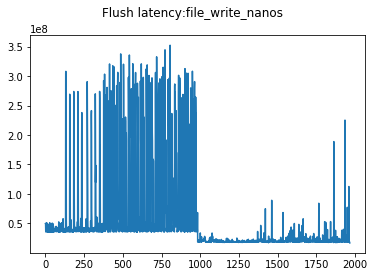

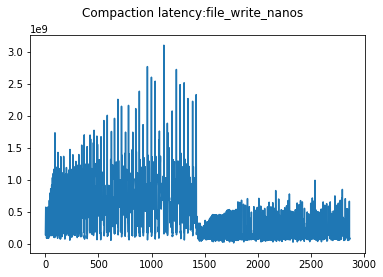

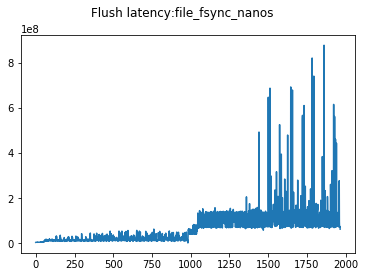

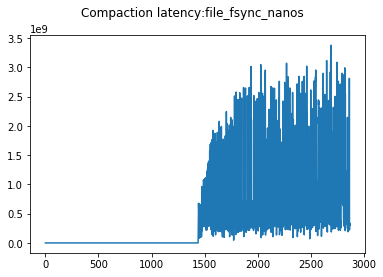

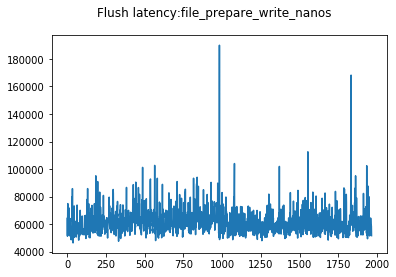

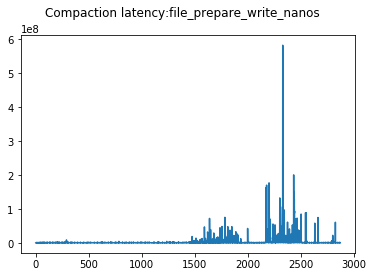

In [6]:
for line in none_direct_io_log_content:
    # print(line)
    line = re.search('(\{.+\})', line)
    if line:
        log_row = json.loads(line[0])
        if log_row['event'] == 'flush_finished':
            for io_measurement in io_measurements:
                flush_io_detail_dict[io_measurement].append(log_row.get(io_measurement,0))
        if log_row['event'] == 'compaction_finished':
            for io_measurement in io_measurements:
                compaction_io_detail_dict[io_measurement].append(log_row.get(io_measurement,0))

print(flush_io_detail_dict)
print(compaction_io_detail_dict)

for io_measurement in io_measurements:
    plt.figure()
    plt.suptitle("Flush latency:" + io_measurement)
    plt.plot(flush_io_detail_dict[io_measurement])
    plt.figure()
    plt.suptitle("Compaction latency:" + io_measurement)
    plt.plot(compaction_io_detail_dict[io_measurement])
    